In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# drop id
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

## 1. Target Variable (SalePrice)

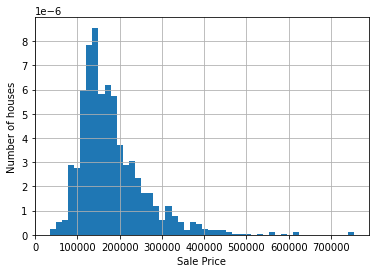

In [4]:
# plot the distribution 
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

* The distribution is skewed to the right, we can conduct a transformation.

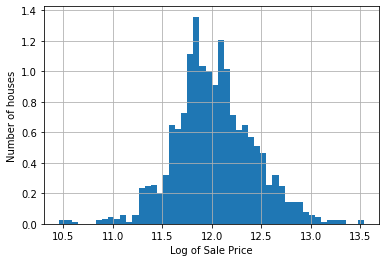

In [5]:
# use the logarithm
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

* Now it looks more like a normal distribution.

## 2. Variable types

In [6]:
# identify the categorical variables
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# based on the data_description.txt
cat_vars = cat_vars + ['MSSubClass']
len(cat_vars)

44

In [7]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [8]:
# identify the numerical variables

num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

# number of numerical variables
len(num_vars)

35

## 3. Missing values

In [9]:
# a list of the variables with missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# get the  percentage of missing values and order
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [10]:
# among missing data, which are numerical/categorical
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [11]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
# define a function to see the relationship between missing data and sale price
def analyse_na_value(df, var):

    df = df.copy()
    # if missing, then 1
    df[var] = np.where(df[var].isnull(), 1, 0)

    # median SalePrice in the observations where data is missing vs available
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # bar plot
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

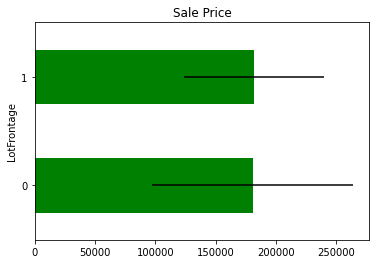

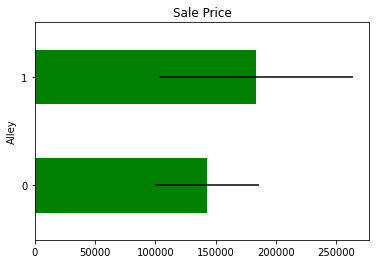

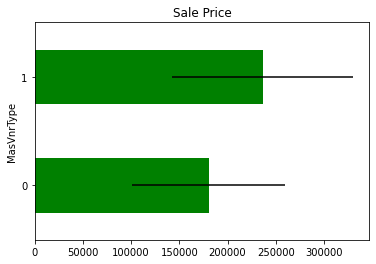

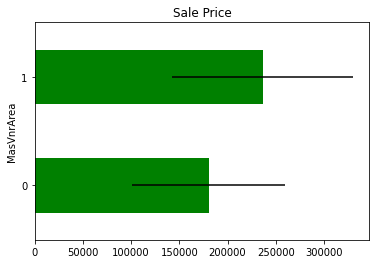

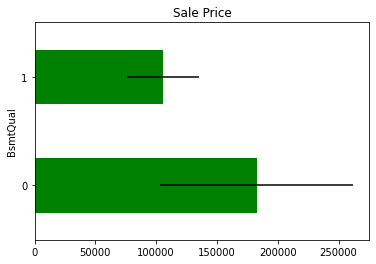

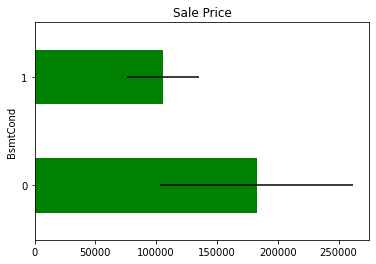

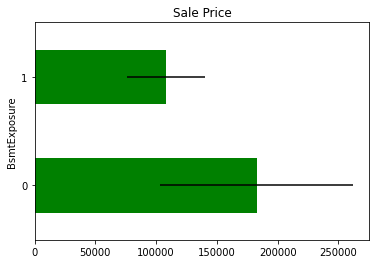

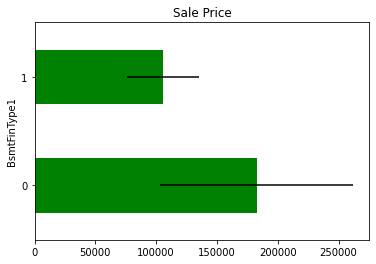

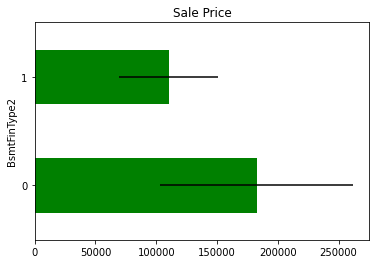

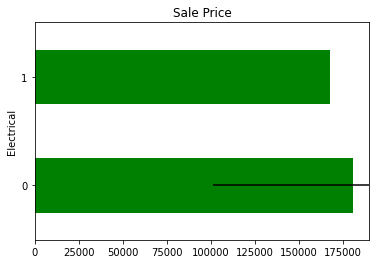

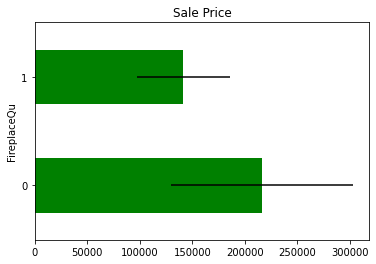

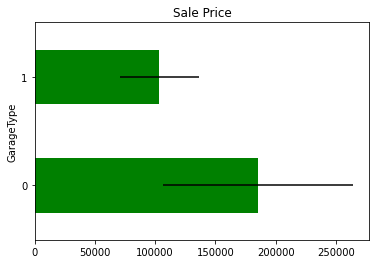

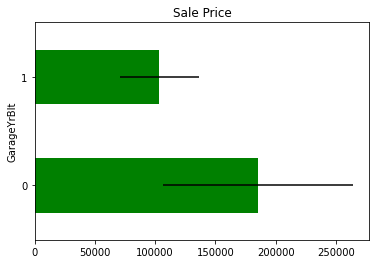

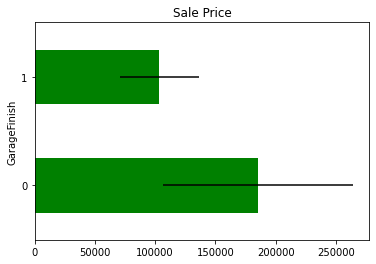

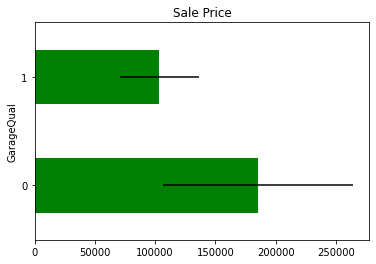

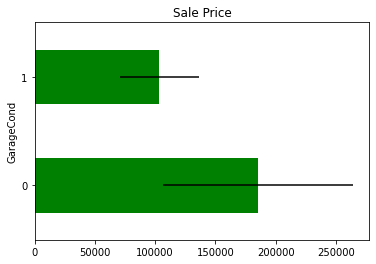

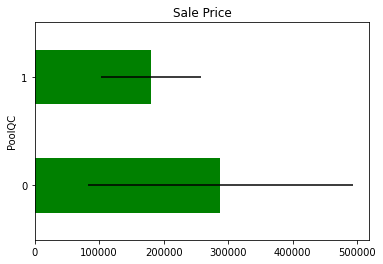

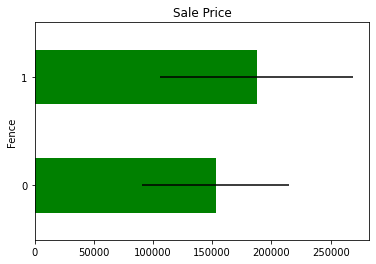

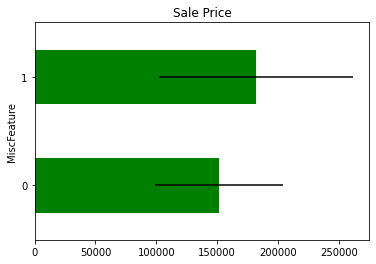

In [14]:
for var in vars_with_na:
    analyse_na_value(data, var)

* In some variables, the average SalePrice in houses where the information is missing, differs from those where information exists. This suggests that data being missing could be a good predictor of Sale Price.

## 4. Numerical Variables

In [15]:
print('Number of numerical variables: ', len(num_vars))
data[num_vars].head()

Number of numerical variables:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


### 4.1 Temporal Variables

In [16]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
# explore the values
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House Price')

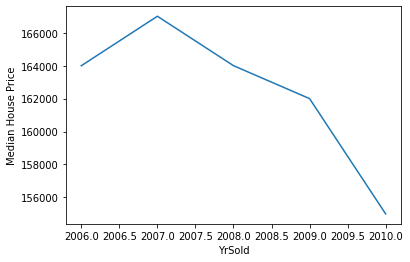

In [18]:
# median sale price vs year in which it was sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

* There was a decline in value of houses, which is unexpected, since house prices typically go up.

Text(0, 0.5, 'Median House Price')

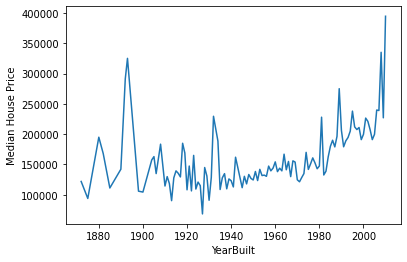

In [19]:
#  median sale price vs year in which it was built
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

* Newly built houses tend to be more expensive.

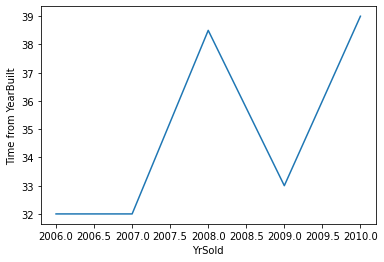

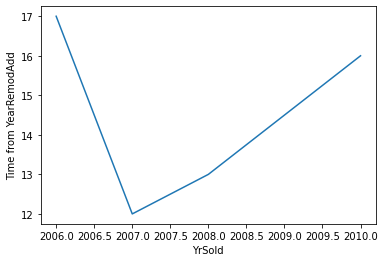

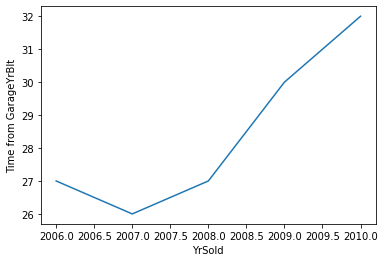

In [20]:
# capture the elapsed years
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

* Towards 2010, the houses sold had older garages, and had not been remodelled recently, which might explain why we see cheaper sales prices in recent years.

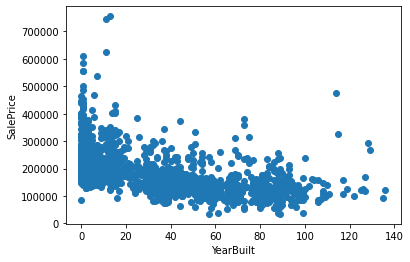

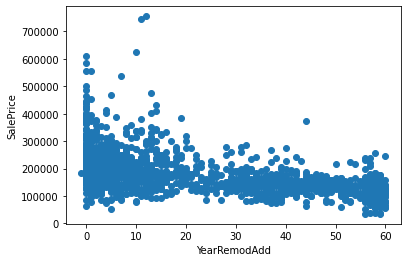

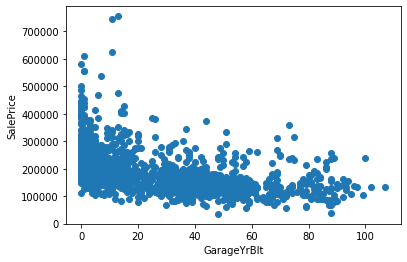

In [21]:
# plot elapsed years vs saleprice
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

* The longer the time between the house was built or remodeled and sale date, the lower the sale Price, which align with business logic.

### 4.2 Discrete Variables

In [22]:
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))
data[discrete_vars].head()

Number of discrete variables:  13


,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


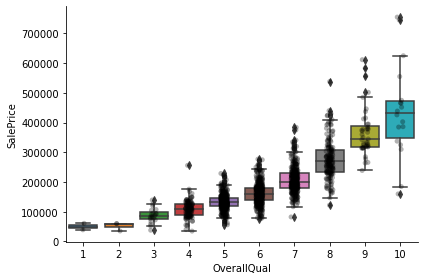

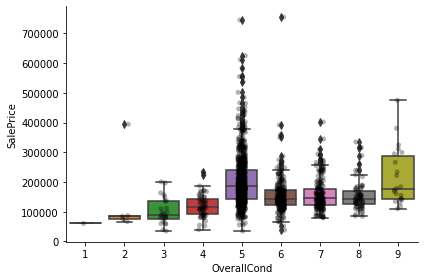

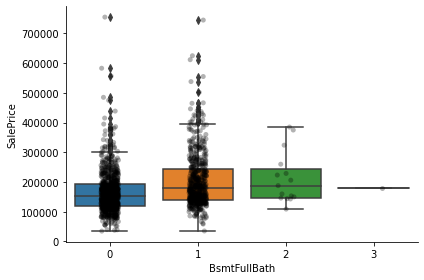

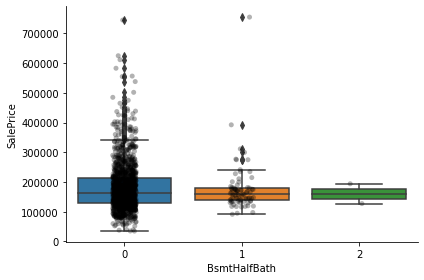

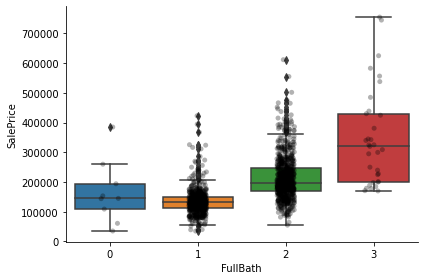

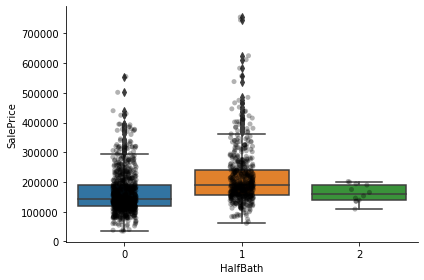

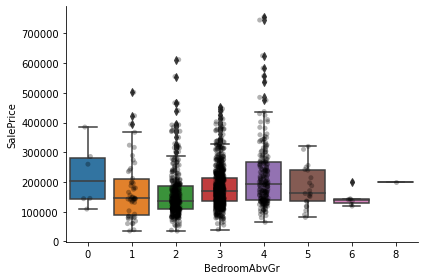

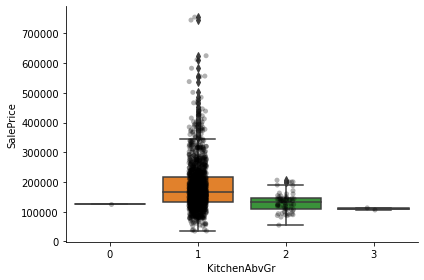

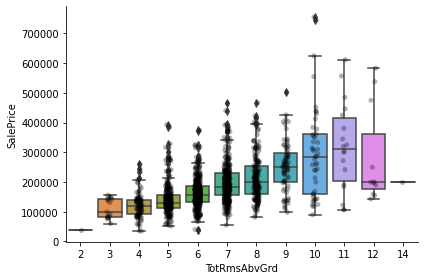

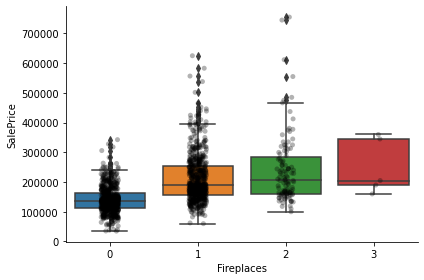

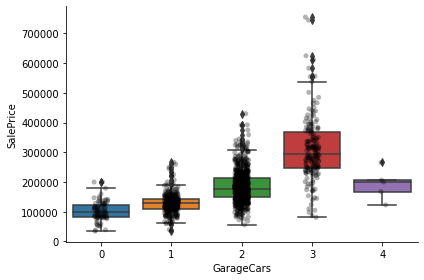

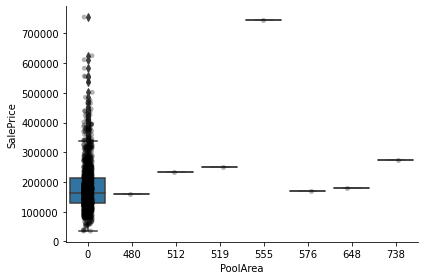

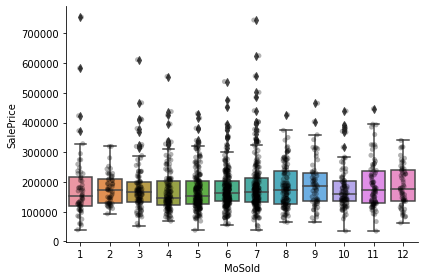

In [23]:
# plot
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

* We see a positive relationship between some variables and the sale price, which indicates those variables could be valuable predictors.

### 4.3 Continous Variables

In [24]:
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

data[cont_vars].head()

Number of continuous variables:  18


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


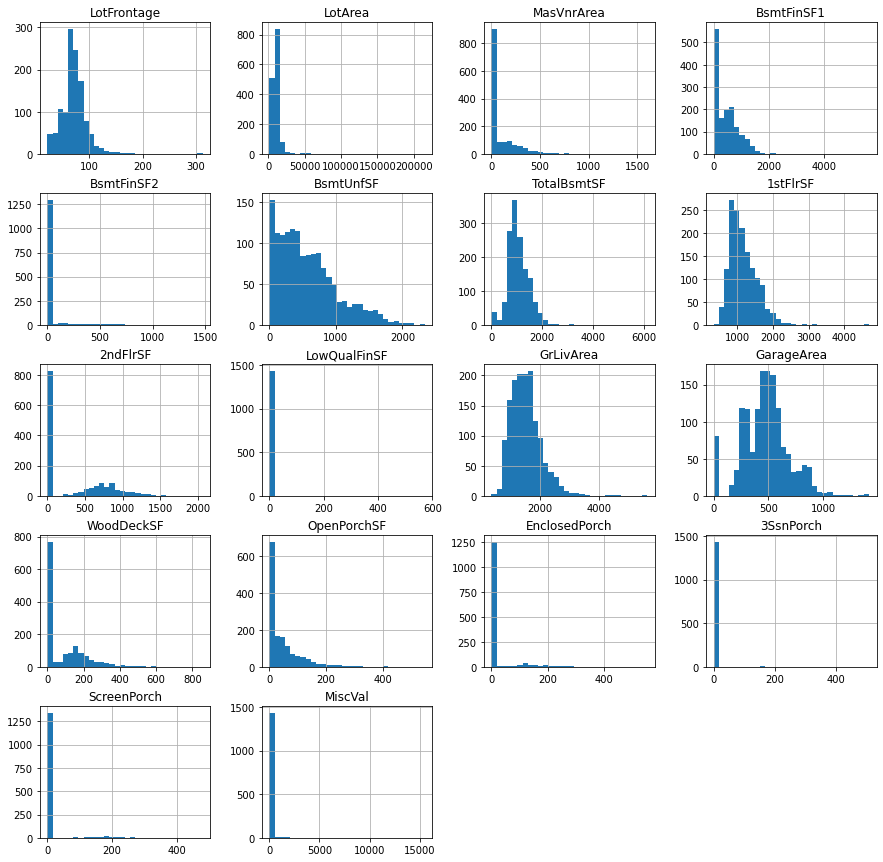

In [25]:
# histogram 
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

* The variables are not normally distributed. Some are particularly skewed, such as 3SsnPorch, ScreenPorch and MiscVal.

* Apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

In [26]:
# list of extremly skewed variables
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

# others continuous variables
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

#### 4.3.1 Yeo-Johnson transformation

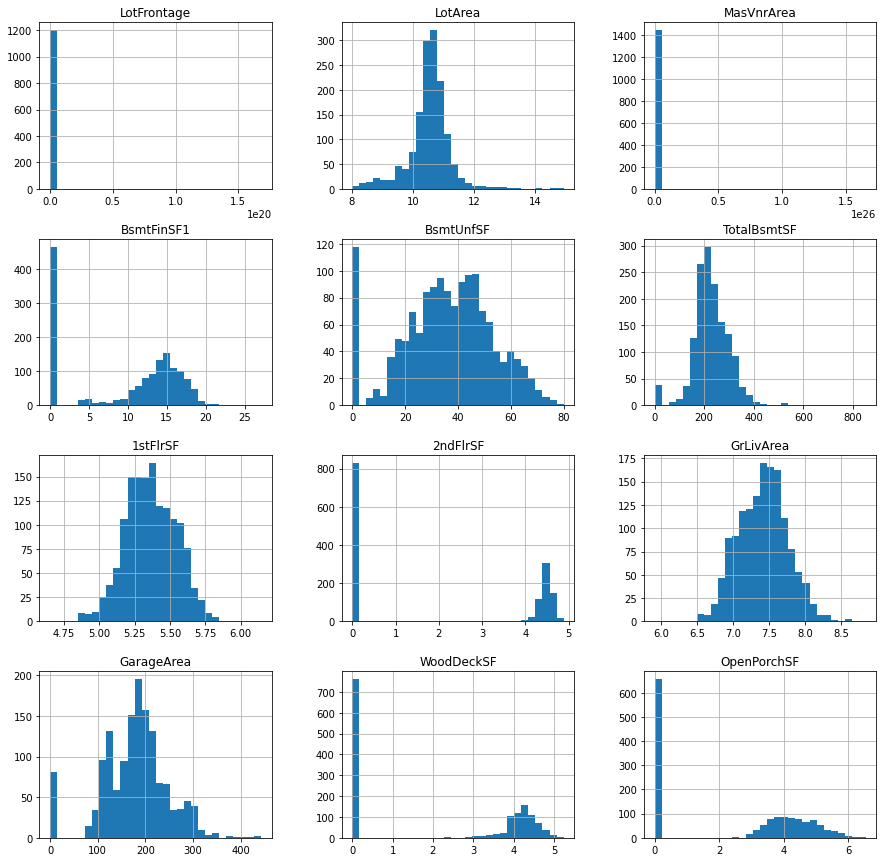

In [27]:
# copy 
tmp = data.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(data[var])

    
# plot
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

* For LotFrontage and MasVnrArea, the transformation did not perform well.

* For others, the values seem to be spread more evenly.

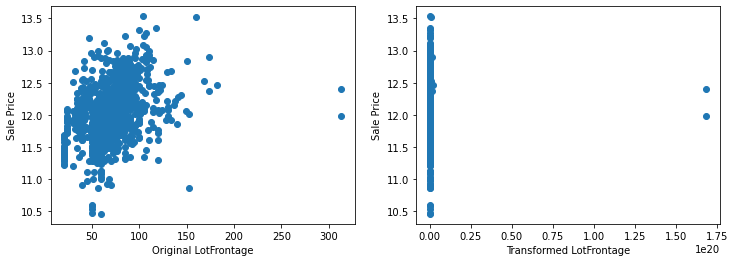

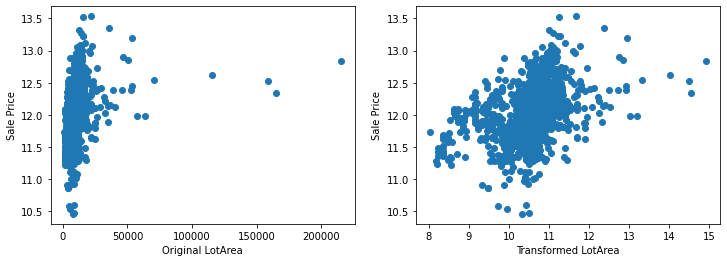

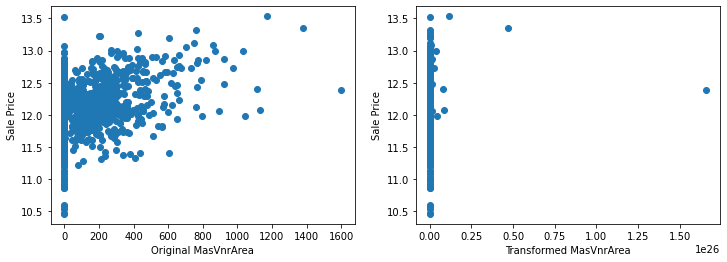

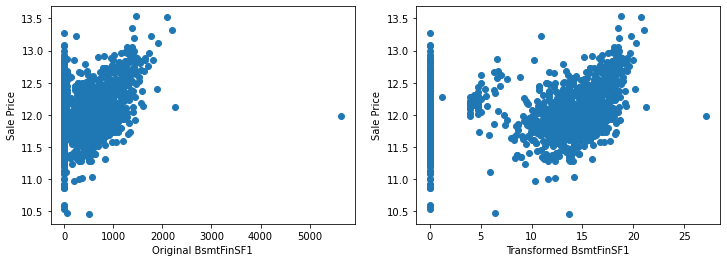

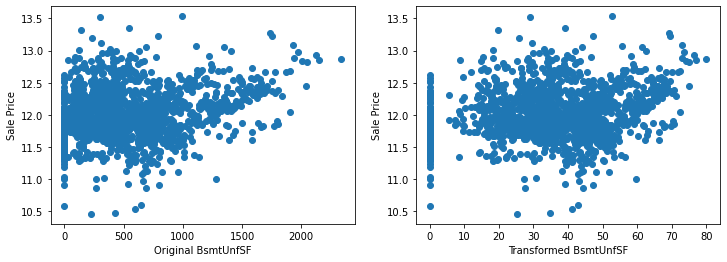

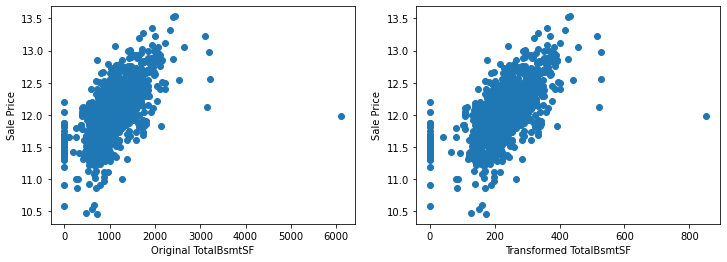

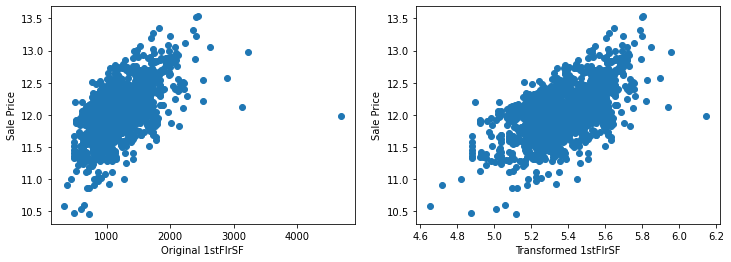

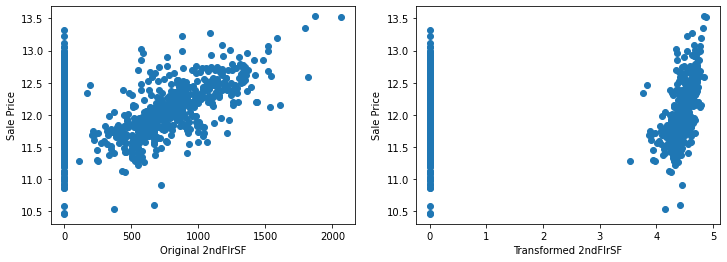

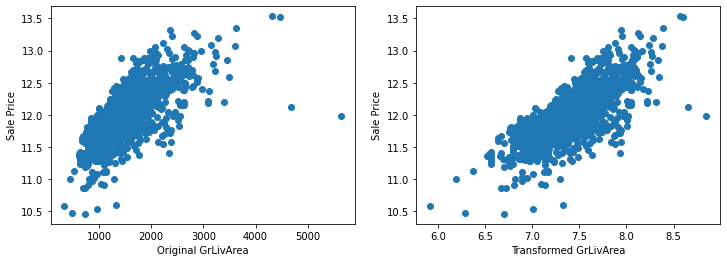

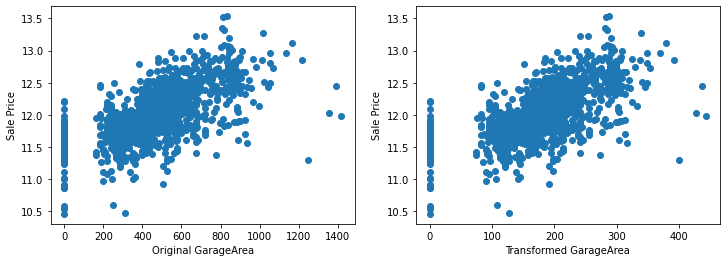

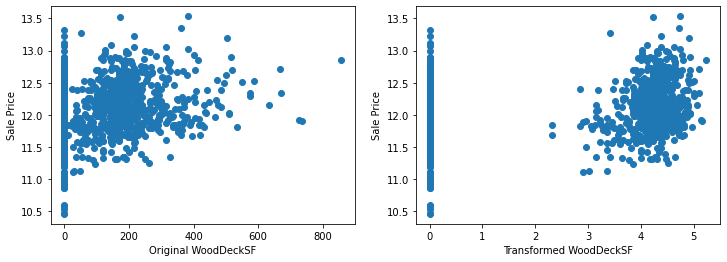

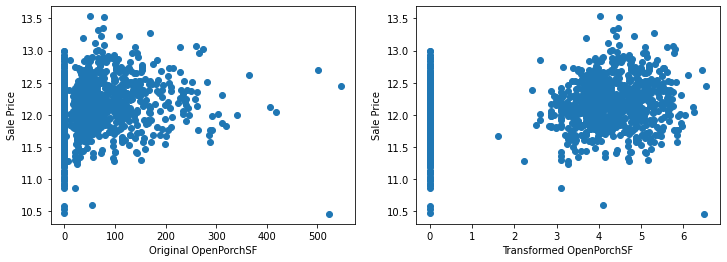

In [28]:
# let's plot the original or transformed variables vs sale price

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original   
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

* The transformation seems to only improve for LotArea.

#### 4.3.2 Logarithmic transformation

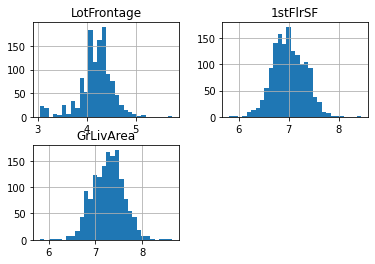

In [29]:
# logarithmic transformation (for positive variables)

tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

* The distribution looks more like normal distribution. 

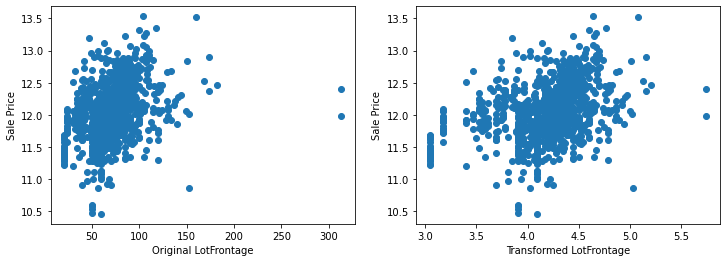

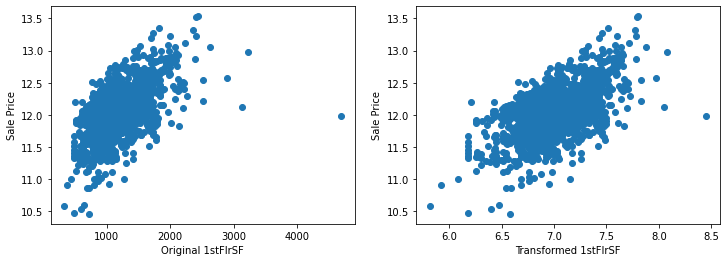

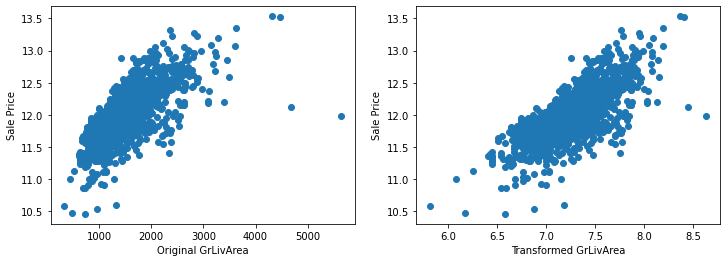

In [30]:
# let's plot the original or transformed variables vs sale price

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # the original 
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # the transformed
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

* The transformed variables have a better spread of the values, which may lead to better prediction.

### 4.4 Skewed Variables

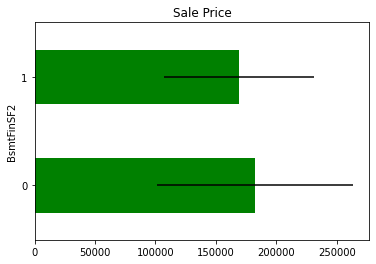

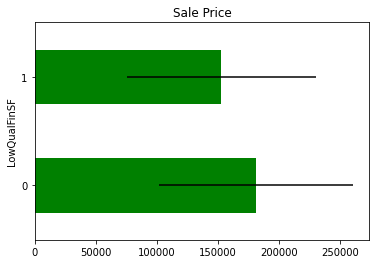

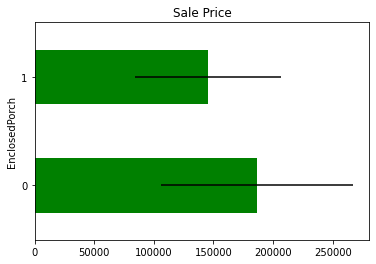

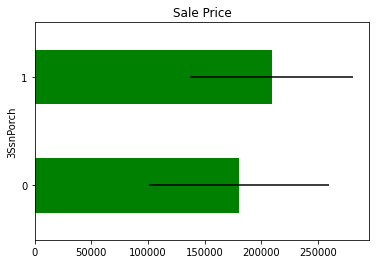

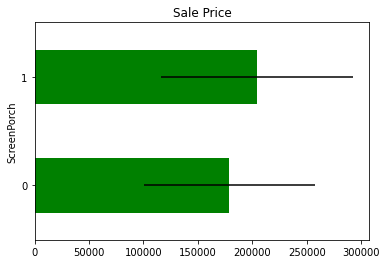

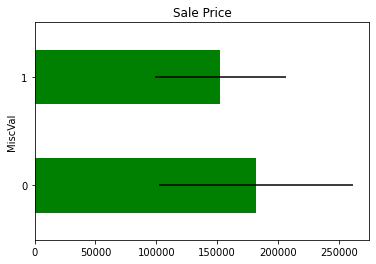

In [31]:
for var in skewed:
    
    tmp = data.copy()
    
    # map the variables into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

* We sees a difference in Sale Price in the mapped values, but the confidence intervals overlap, so this is probably not significant/predictive.

# 5. Categorical Variables

In [32]:
print('Number of categorical variables: ', len(cat_vars))

data[cat_vars].head()

Number of categorical variables:  44


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


<AxesSubplot:>

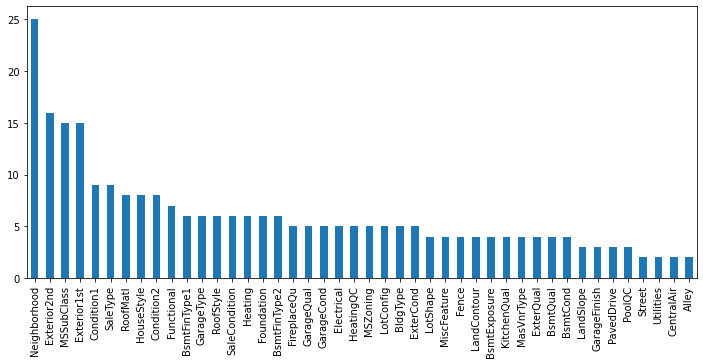

In [33]:
# number of labels (cardinality)
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))


### 5.1 Quality Variables

In [34]:
# re-map strings to numbers, which determine quality
# Ex = Excellent, Gd = Good, TA = Average/Typical, Fa = Fair, Po = Poor
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [35]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [36]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [37]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [38]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [39]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

In [40]:
data[qual_vars]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2,BsmtExposure,GarageFinish,Fence
0,4,3,4.0,3.0,5,4,NaN,3.0,3.0,6.0,1.0,1.0,2.0,NaN
1,3,3,4.0,3.0,5,3,3.0,3.0,3.0,5.0,1.0,4.0,2.0,NaN
2,4,3,4.0,3.0,5,4,3.0,3.0,3.0,6.0,1.0,2.0,2.0,NaN
3,3,3,3.0,4.0,4,4,4.0,3.0,3.0,5.0,1.0,1.0,1.0,NaN
4,4,3,4.0,3.0,5,4,3.0,3.0,3.0,6.0,1.0,3.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4.0,3.0,5,3,3.0,3.0,3.0,1.0,1.0,1.0,2.0,NaN
1456,3,3,4.0,3.0,3,3,3.0,3.0,3.0,5.0,3.0,1.0,1.0,3.0
1457,5,4,3.0,4.0,5,4,4.0,3.0,3.0,6.0,1.0,1.0,2.0,4.0
1458,3,3,3.0,3.0,4,4,NaN,3.0,3.0,6.0,3.0,2.0,1.0,NaN


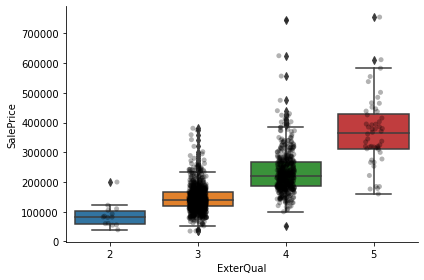

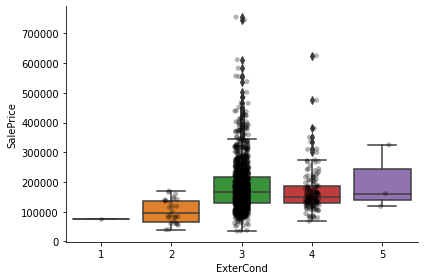

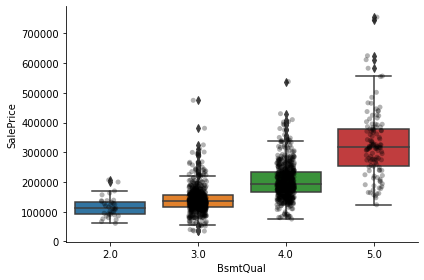

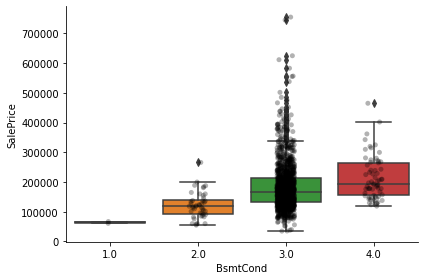

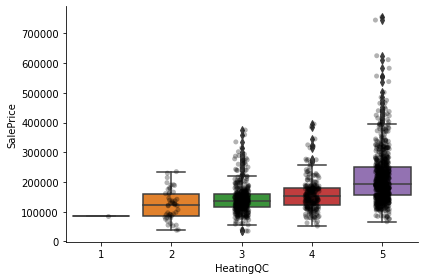

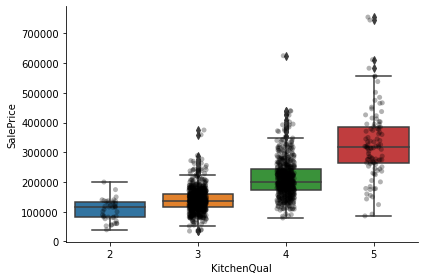

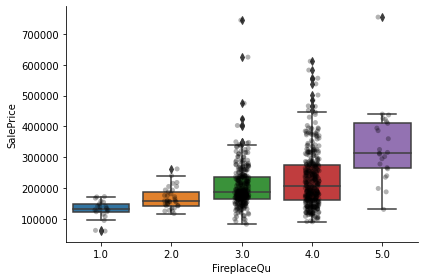

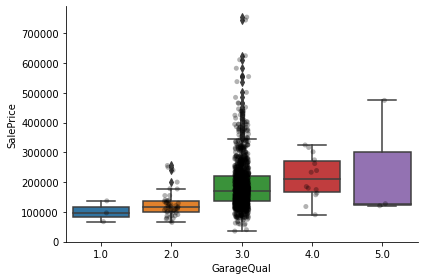

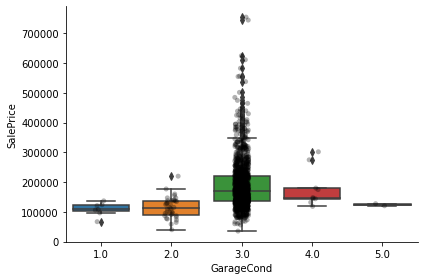

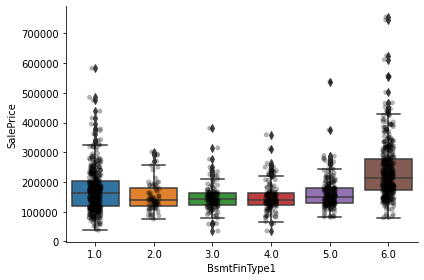

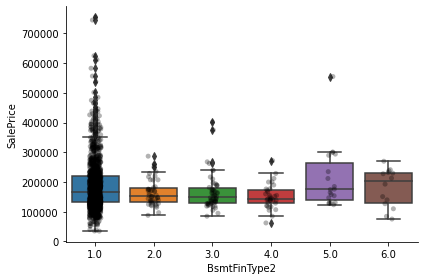

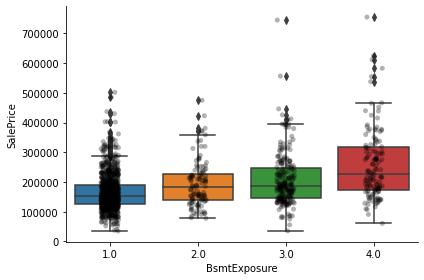

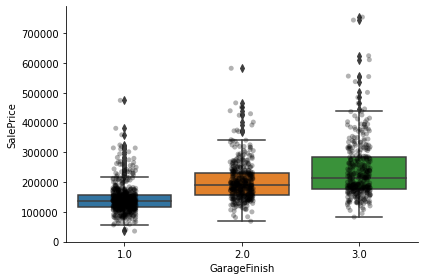

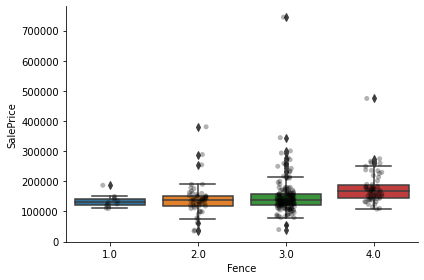

In [41]:
# plot the house mean sale price vs quality variables

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

* We see a positive impact for most attributes.

In [42]:
# remaining categorical variables (did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

### 5.2 Rare labels

In [43]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return rare categories
    return tmp[tmp < rare_perc]

# set 1% as the threshold

for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

* Some categorical variables include multiple labels that are present in less than 1% of the houses.

* Labels that are under-represented in the dataset tend to overfit machine learning models, which is why we want to remove them.

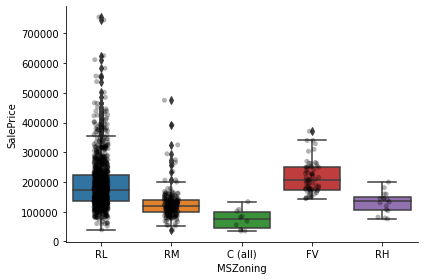

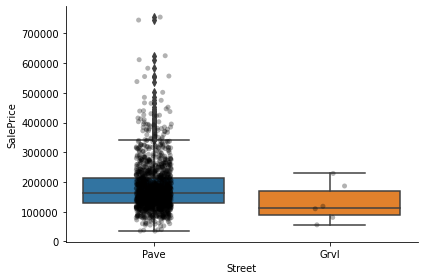

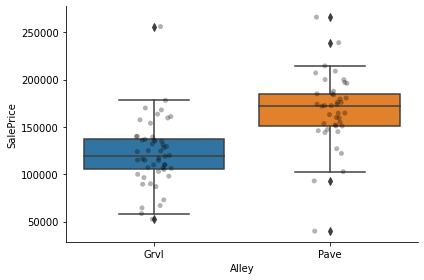

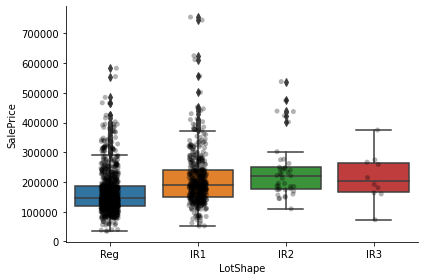

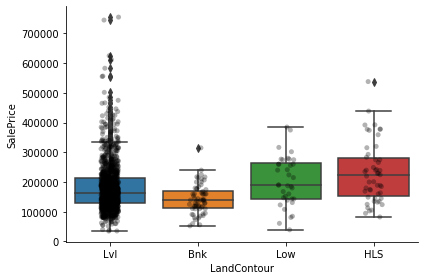

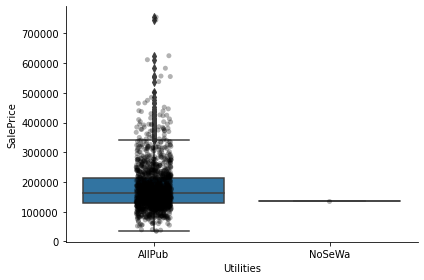

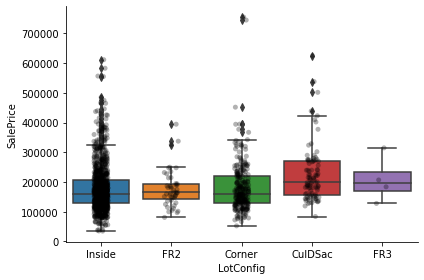

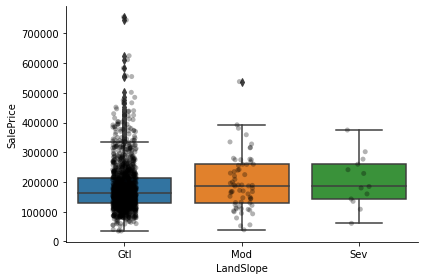

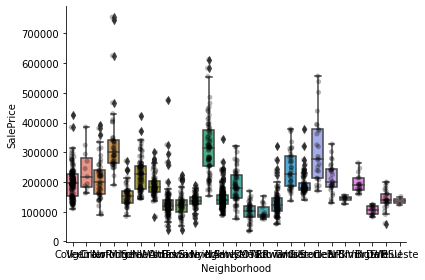

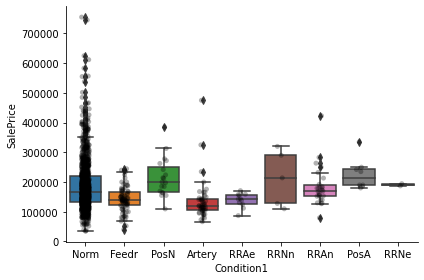

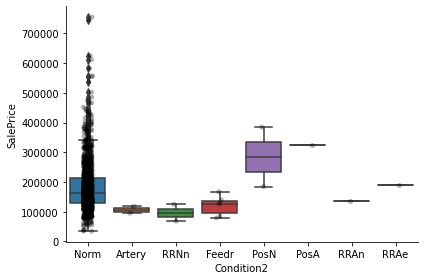

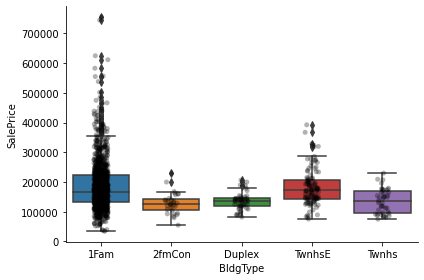

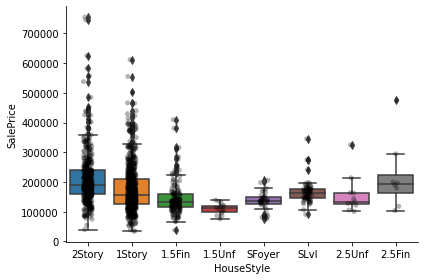

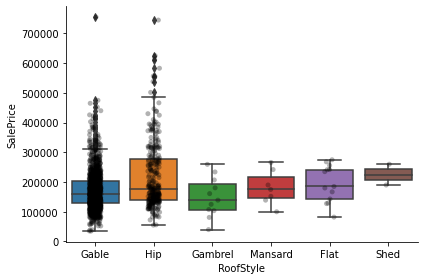

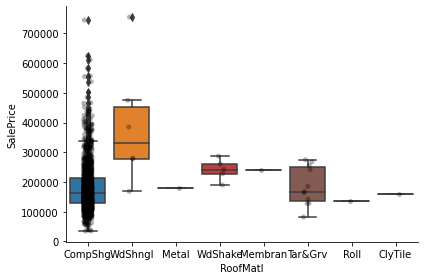

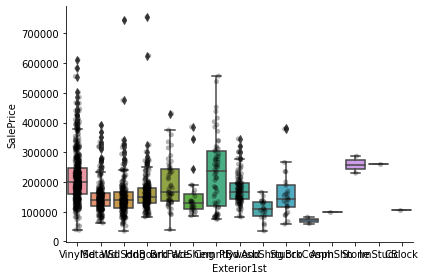

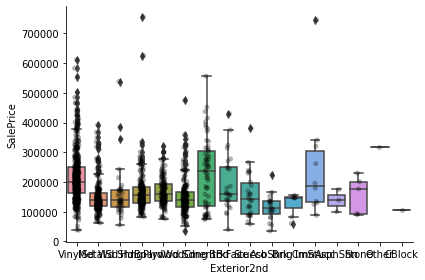

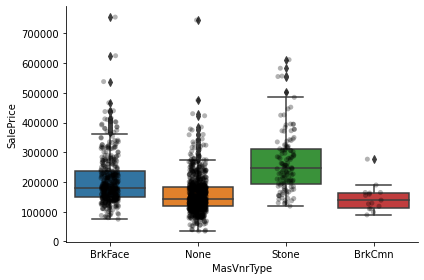

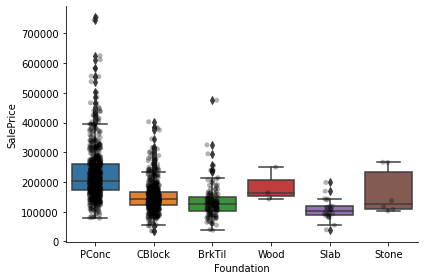

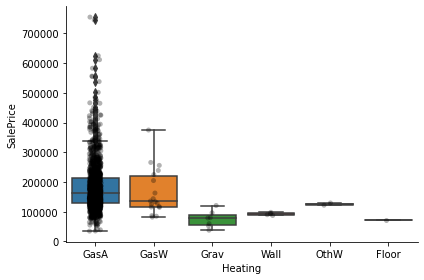

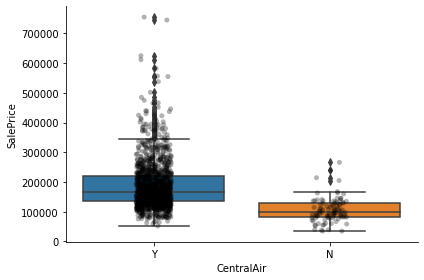

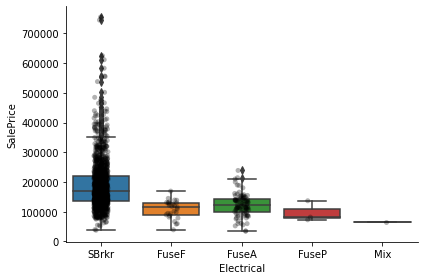

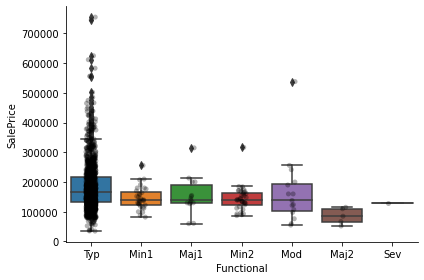

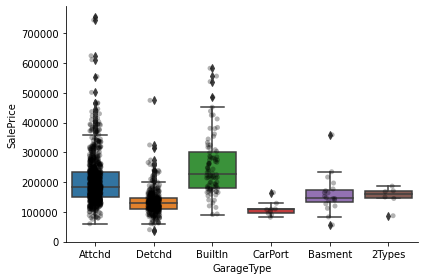

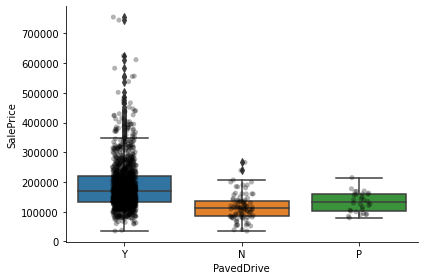

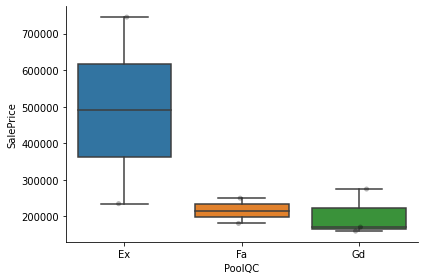

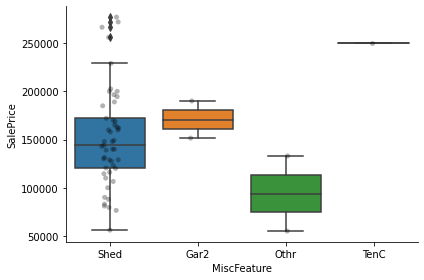

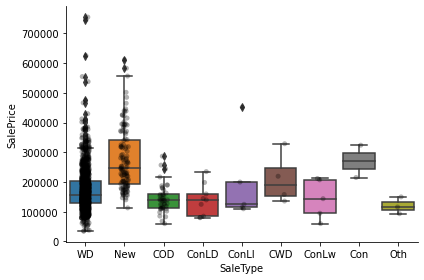

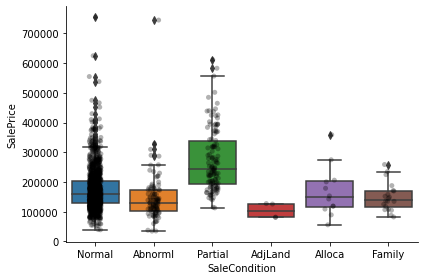

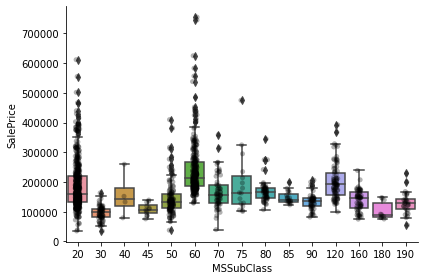

In [44]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

* Different categories show various median sale prices, which means some of them might be good indicators of the predictive model. 